<a target="_blank" href="https://colab.research.google.com/github/mohsinansari0705/Machine-Learning-Data-Science/blob/main/Bulldozer-Price-prediction/end-to-end-bluebook-bulldozer-price-regression.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/Bulldozer-Price-prediction/end-to-end-bluebook-bulldozer-price-regression.ipynb">
  <img src="https://img.shields.io/badge/GitHub-Repository-blue?logo=github" alt="View source code"/>
</a>

# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning <hr>

In this notebook, we're going to go through an example machine learning project to use the characteristics of bulldozers and their past sales prices to predict the sale price of future bulldozers based on their characteristics.

* **Inputs:** Bulldozer characteristics such as make year, base model, model series, state of sale (e.g. which US state was it sold in), drive system and more.
* **Outputs:** Bulldozer sale price (in USD).

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

And since we're going to predicting results with a time component (predicting future sales based on past sales), this is also known as a **time series** or **forecasting** problem.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

The techniques used in here have been inspired and adapted from [the fast.ai machine learning course](https://course18.fast.ai/ml).

## Overview

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

To work through these topics, we'll use pandas, Matplotlib and NumPy for data analysis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a trained machine learning model which predicts the sale price of a bulldozer given different characteristics about it.

### 6 Step Machine Learning Framework

#### 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

#### 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) we see that it contains historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv** - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

> **Note:** You can download the dataset `bluebook-for-bulldozers` dataset directly from Kaggle. Alternatively, you can also [download it directly from the course GitHub](https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/data/bluebook-for-bulldozers.zip).

#### 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible (a low error value means our model's predictions are close to what the real values are).

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

#### 4. Features

Features are different parts and attributes of the data. 

During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this is to create a **data dictionary**.

For this dataset, Kaggle provides a data dictionary which contains information about what each attribute of the dataset means. 

For example: 

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 

You can download the full version of this file directly from the [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (Kaggle account required) or view it [on Google Sheets](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. 

In [1]:
# Timestamp
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-10-29 19:25:21.370448


## 1. Importing the data and preparing it for modelling

First thing is first, let's get the libraries we need imported and the data we'll need for the project.

We'll start by importing pandas, NumPy and matplotlib.

In [2]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Print the versions we're using (as long as your versions are equal or higher than these, the code should work)
print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

plt.style.use('ggplot')

pandas version: 2.3.3
NumPy version: 2.3.4
matplotlib version: 3.10.7


Now we've got our tools for data analysis ready, we can import the data and start to explore it.

For this project, I've [downloaded the data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data) and stored it on the [GitHub](https://github.com/mohsinansari0705/Machine-Learning-Data-Science) under the file path [`../data/bluebook-for-bulldozers`](https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/data/bluebook-for-bulldozers.zip). 

<a href="https://github.com/mohsinansari0705/Machine-Learning-Data-Science/raw/refs/heads/main/data/bluebook-for-bulldozers.zip" download>Download Dataset</a>

We can write some code to check if the files are available locally (on our computer) and if not, we can download them.

> **Note:** If you're running this notebook on Google Colab, the code below will enable you to download the dataset programmatically. Just beware that each time Google Colab shuts down, the data will have to be redownloaded. There's also an [example Google Colab notebook](https://colab.research.google.com/drive/1hf1rTcCAQP1EN8pZ0ZIqjjEy47dwzbiv) showing how to download the data programmatically.

In [3]:
from pathlib import Path

# Check if 'bluebook-for-bulldozers' exists in the current or parent directory
# Link to data (see the file "bluebook-for-bulldozers"): https://github.com/mohsinansari0705/Machine-Learning-Data-Science/tree/main/data
dataset_dir = Path("../data/bluebook-for-bulldozers")

if not (dataset_dir.is_dir()):
    print("[INFO] Can't find existing 'bluebook-for-bulldozers' dataset in current directory or parent directory, downloading...")

    # Download and unzip the bluebook for bulldozers dataset
    !wget https://github.com/mohsinansari0705/Machine-Learning-Data-Science/raw/refs/heads/main/data/bluebook-for-bulldozers.zip
    !unzip bluebook-for-bulldozers.zip

    # Ensure a data directory exists and move the downloaded dataset there
    !mkdir ../data/
    !mv bluebook-for-bulldozers ../data/
    print(f"[INFO] Current dataset dir: {dataset_dir}")

    # Remove .zip file from notebook directory
    !rm -rf bluebook-for-bulldozers.zip
else:
    # If the target dataset directory exists, we don't need to download it
    print("[INFO] 'bluebook-for-bulldozers' dataset exists, feel free to proceed!")
    print(f"[INFO] Current dataset dir: {dataset_dir}")

[INFO] 'bluebook-for-bulldozers' dataset exists, feel free to proceed!
[INFO] Current dataset dir: ..\data\bluebook-for-bulldozers


Dataset downloaded!

Let's check what files are available.

In [4]:
import os

print(f"[INFO] Files/folders available in {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Files/folders available in ..\data\bluebook-for-bulldozers:


['Data Dictionary.xlsx',
 'Machine_Appendix.csv',
 'median_benchmark.csv',
 'random_forest_benchmark_test.csv',
 'Test.csv',
 'test_predictions.csv',
 'Train.csv',
 'TrainAndValid.csv',
 'train_tmp.csv',
 'Valid.csv',
 'ValidSolution.csv']

You can explore each of these files individually or read about them on the [Kaggle Competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/data).

For now, the main file we're interested in is `TrainAndValid.csv` (this is also a combination of `Train.csv` and `Valid.csv`), this is a combination of the training and validation datasets.

* The training data (`Train.csv`) contains sale data from 1989 up to the end of 2011.
* The validation data (`Valid.csv`) contains sale data from January 1, 2012 - April 30, 2012.
* The test data (`Test.csv`) contains sale data from May 1, 2012 - November 2012.

We'll use the training data to train our model to predict the sale price of bulldozers, we'll then validate its performance on the validation data to see if our model can be improved in any way. Finally, we'll evaluate our best model on the test dataset.

But more on this later on.

Let's import the `TrainAndValid.csv` file and turn it into a pandas DataFrame.

In [5]:
# Import the training and validation set
df = pd.read_csv(filepath_or_buffer="../data/bluebook-for-bulldozers/TrainAndValid.csv")

C:\Users\Mohsin Ansari\AppData\Local\Temp\ipykernel_10492\1127193594.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer="../data/bluebook-for-bulldozers/TrainAndValid.csv")


Wonderful! We've got our DataFrame ready to explore.

You might see a warning appear in the form:

`DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False. df = pd.read_csv("../data/bluebook-for-bulldozers/TrainAndValid.csv")`

This is just saying that some of our columns have multiple/mixed data types. For example, a column may contain strings but also contain integers. This is okay for now and can be addressed later on if necessary.

How about we get some information about our DataFrame?


In [6]:
# Get info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Woah! Over 400,000 entries!

That's a much larger dataset than what we've worked with before.

One thing you might have noticed is that the `saledate` column value is being treated as a Python object (it's okay if you didn't notice, these things take practice).

When the `Dtype` is `object`, it's saying that it's a string.

However, when we look at it...



In [7]:
df["saledate"][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

We can see that these `object`'s are in the form of dates.

Since we're working on a **time series** problem (a machine learning problem with a time component), it's probably worth it to turn these strings into Python `datetime` objects.

Before we do, let's try visualize our `saledate` column against our `SalePrice` column.

To do so, we can create a scatter plot.

And to prevent our plot from being too big, how about we visualize the first 1000 values?

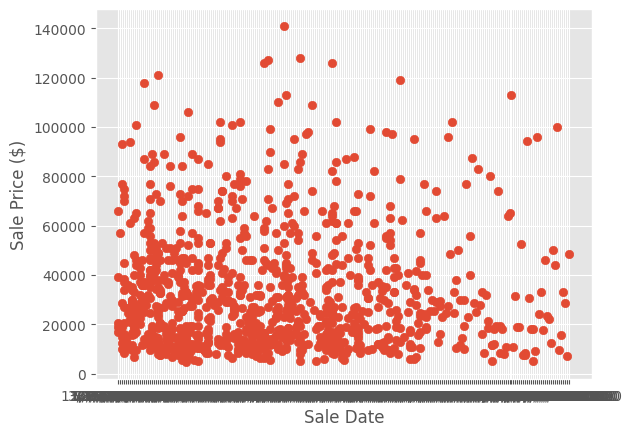

In [8]:
fig, ax = plt.subplots()

ax.scatter(
    x=df["saledate"][:1000], # visualize the first 1000 values
    y=df["SalePrice"][:1000]
)

ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)")

plt.show()

Hmm... looks like the x-axis is quite crowded.

Maybe we can fix this by turning the `saledate` column into `datetime` format.

Good news is that it looks like our `SalePrice` column is already in `float64` format so we can view its distribution directly from the DataFrame using a histogram plot.

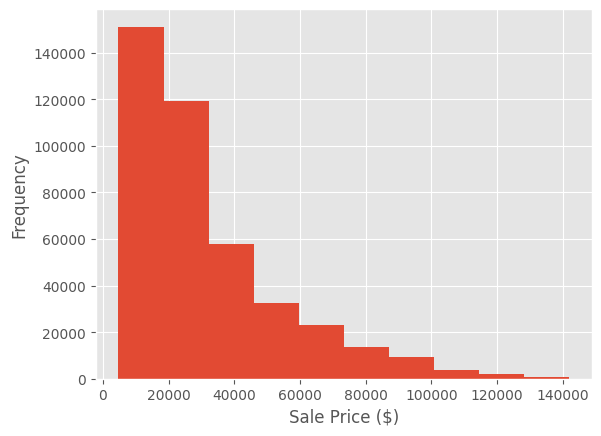

In [9]:
# View SalePrice distribution 
df['SalePrice'].plot.hist(xlabel="Sale Price ($)")

plt.show()

### 1.1 Parsing dates

When working with time series data, it's a good idea to make sure any `date` data is the format of a [datetime object](https://docs.python.org/3/library/datetime.html) (a Python data type which encodes specific information about dates).

We can tell pandas which columns to read in as dates by setting the `parse_dates` parameter in [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Once we've imported our CSV with the `saledate` column parsed, we can view information about our DataFrame again with `df.info()`. 

In [10]:
df = pd.read_csv(filepath_or_buffer="../data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,          # set low_memory=False to prevent mixed data types warning 
                 parse_dates=["saledate"])  # can use the parse_dates parameter and specify which column to treat as a date column

# With parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

Nice!

Looks like our `saledate` column is now of type [`datetime64[ns]`](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.datetime64), a NumPy-specific datetime format with high precision.

Since pandas works well with NumPy, we can keep it in this format.

How about we view a few samples from our `SaleDate` column again?

In [11]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

Beautiful! That's looking much better already. 

We'll see how having our dates in this format is really helpful later on.

For now, how about we visualize our `saledate` column against our `SalePrice` column again?

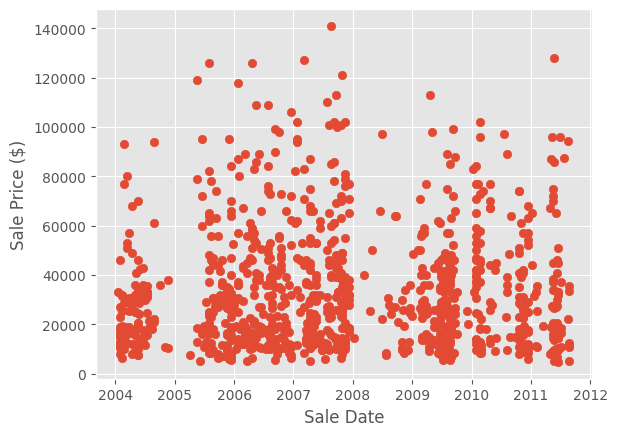

In [12]:
fig, ax = plt.subplots()

ax.scatter(
    x=df["saledate"][:1000],
    y=df["SalePrice"][:1000]
)

ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)")

plt.show()

### 1.2 Sorting our DataFrame by saledate

Now we've formatted our `saledate` column to be NumPy `datetime64[ns]` objects, we can use built-in pandas methods such as `sort_values` to sort our DataFrame by date.

And considering this is a time series problem, sorting our DataFrame by date has the added benefit of making sure our data is sequential.

In other words, we want to use examples from the past (example sale prices from previous dates) to try and predict future bulldozer sale prices. 

Let's use the [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method to sort our DataFrame by `saledate` in ascending order.

In [13]:
# Sort DataFrame in date order
df = df.sort_values(by=["saledate"], ascending=True)

df['saledate'].head(10), df['saledate'].tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

Nice!

Looks like our older samples are now coming first and the newer samples are towards the end of the DataFrame.

### 1.3 Adding extra features to our DataFrame

One way to potentially increase the predictive power of our data is to enhance it with more features.

This practice is known as [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), taking existing features and using them to create more/different features. 

There is no set in stone way to do feature engineering and often it takes quite a bit of practice/exploration/experimentation to figure out what might work and what won't.

For now, we'll use our `saledate` column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [14]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

Because we imported the data using `read_csv()` and we asked pandas to parse the dates using `parase_dates=["saledate"]`, we can now access the [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column.

Let's use these attributes to add a series of different feature columns to our dataset. 

After we've added these extra columns, we can remove the original `saledate` column as its information will be dispersed across these new columns.

In [15]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp['saledate'].dt.year
df_tmp["saleMonth"] = df_tmp['saledate'].dt.month
df_tmp["saleDay"] = df_tmp['saledate'].dt.day
df_tmp["saleDayofweek"] = df_tmp['saledate'].dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp['saledate'].dt.dayofyear

# Drop original saledate column
df_tmp = df_tmp.drop("saledate", axis=1)

We could add more of these style of columns, such as, whether it was the start or end of a quarter (the sale being at the end of a quarter may bye influenced by things such as quarterly budgets) but these will do for now.

> **Challenge:** See what other [datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) you can add to `df_tmp` using a similar technique to what we've used above. Hint: check the bottom of the [`pandas.DatetimeIndex`](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html) docs.

How about we view some of our newly created columns?

In [16]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


Cool!

Now we've broken our `saledate` column into columns/features, we can perform further exploratory analysis such as visualizing the `SalePrice` against the `saleMonth`.

How about we view the first 10,000 samples (we could also randomly select 10,000 samples too) to see if reveals anything about which month has the highest sales?

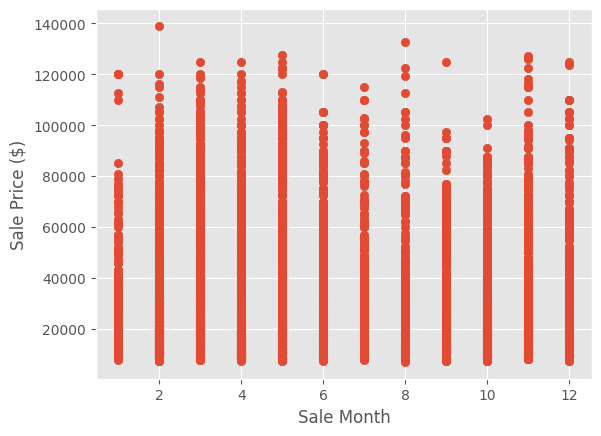

In [17]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()

ax.scatter(
    x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
    y=df_tmp["SalePrice"][:10000]
)

ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)")

plt.show()

Hmm... doesn't look like there's too much conclusive evidence here about which month has the highest sales value.

How about we plot the median sale price of each month?

We can do so by grouping on the `saleMonth` column with [`pandas.DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) and then getting the median of the `SalePrice` column.

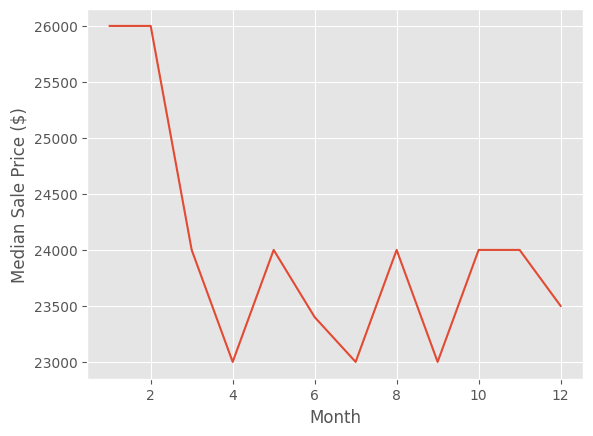

In [18]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()

plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)")

plt.show()

Ohhh it looks like the median sale prices of January and February (months 1 and 2) are quite a bit higher than the other months of the year.

Could this be because of New Year budget spending?

Perhaps... but this would take a bit more investigation.

In the meantime, there are many other values we could look further into.

### 1.4 Inspect values of other columns

When first exploring a new problem, it's often a good idea to become as familiar with the data as you can.

Of course, with a dataset that has over 400,000 samples, it's unlikely you'll ever get through every sample.

But that's where the power of data analysis and machine learning can help.

We can use pandas to aggregate thousands of samples into smaller more managable pieces.

And as we'll see later on, we can use machine learning models to model the data and then later inspect which features the model thought were most important.

How about we see which states sell the most bulldozers?

In [19]:
# Check the different values of different columns
df_tmp['state'].value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

Woah! Looks like Florida sells a fair few bulldozers.

How about we go even further and group our samples by `state` and then find the median `SalePrice` per state?

We also compare this to the median `SalePrice` for all samples.

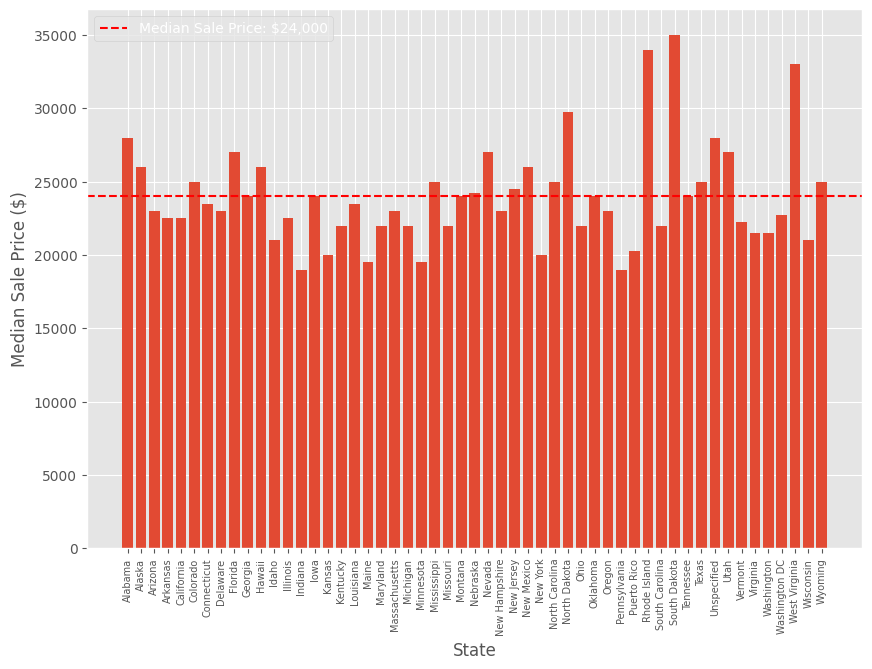

In [20]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))

plt.bar(
    x=median_prices_by_state.index,       # Because we're working with a Series, we can use the index (state names) as the x values
    height=median_prices_by_state.values
)

plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")

plt.xticks(rotation=90, fontsize=7)
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend()

plt.show()

Now that's a nice looking figure!

Interestingly Florida has the most sales and the median sale price is above the overall median of all other states.

And if you had a bulldozer and were chasing the highest sale price, the data would reveal that perhaps selling in South Dakota would be your best bet.

Perhaps bulldozers are in higher demand in South Dakota because of a building or mining boom?

Answering this would require a bit more research.

But what we're doing here is slowly building up a mental model of our data. 

So that if we saw an example in the future, we could compare its values to the ones we've already seen.

## 2. Model driven data exploration

We've performed a small Exploratory Data Analysis (EDA) as well as enriched it with some `datetime` attributes, now let's try to model it.

Why model so early?

Well, we know the evaluation metric (root mean squared log error or RMSLE) we're heading towards. 

We could spend more time doing EDA, finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA whilst simultaneously working towards the best evaluation metric we can get. 

Remember, one of the biggest goals of starting any new machine learning project is reducing the time between experiments.

Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html) and taking into account the fact we've got over 100,000 examples, we find a [`sklearn.linear_model.SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) or a [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn-ensemble-randomforestregressor) model might be a good candidate.

Since we're worked with the Random Forest algorithm before (on the [heart disease classification problem](https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/Heart-Disease-predictor/end_to_end_heart_disease_classification.ipynb)), let's try it out on our regression problem.

> **Note:** We're trying just one model here for now. But you can try many other kinds of models from the Scikit-Learn library, they mostly work with a similar API. There are even libraries such as [`LazyPredict`](https://github.com/shankarpandala/lazypredict) which will try many models simultaneously and return a table with the results.

In [21]:
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(
    X=df_tmp.drop("SalePrice", axis=1),  # use all columns except SalePrice as X input
    y=df_tmp.SalePrice                   # use SalePrice column as y input
)

ValueError: could not convert string to float: 'Low'

Oh no!

When we try to fit our model to the data, we get a value error similar to:

> `ValueError: could not convert string to float: 'Low'`

The problem here is that some of the features of our data are in string format and machine learning models love numbers.

Not to mention some of our samples have missing values.

And typically, machine learning models require all data to be in numerical format as well as all missing values to be filled.

Let's start to fix this by inspecting the different datatypes in our DataFrame.

We can do so using the [`pandas.DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method, this will give us the different datatypes as well as how many non-null (a null value is generally a missing value) in our `df_tmp` DataFrame.

> **Note:** There are some ML models such as [`sklearn.ensemble.HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html), [CatBoost](https://catboost.ai/) and [XGBoost](https://xgboost.ai/) which can handle missing values.

In [22]:
# Check for missing values and different datatypes 
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Ok, it seems as though we've got a fair few different datatypes. 

There are `int64` types such as `MachineID`.

There are `float64` types such as `SalePrice`.

And there are `object` (the `object` dtype can hold any Python object, including strings) types such as `UseageBand`.

> **Resource:** You can see a list of all the [pandas dtypes in the pandas user guide](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes).

How about we find out how many missing values are in each column?

We can do so using [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) (`isna` stands for 'is null or NaN') which will return a boolean `True`/`False` if a value is missing (`True` if missing, `False` if not). 

Let's start by checking the missing values in the head of our DataFrame.

In [23]:
# Find missing values in the head of our DataFrame 
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
274835,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
212552,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


Alright it seems as though we've got some missing values in the `MachineHoursCurrentMeter` as well as the `UsageBand` and a few other columns.

But so far we've only viewed the first few rows.

It'll be very time consuming to go through each row one by one so how about we get the total missing values per column?

We can do so by calling `.isna()` on the whole DataFrame and then chaining it together with `.sum()`.

Doing so will give us the total `True`/`False` values in a given column (when summing, `True` = 1, `False` = 0).

In [24]:
# Check for total missing values per column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

Woah! It looks like our DataFrame has quite a few missing values.

Not to worry, we can work on fixing this later on.

How about we start by tring to turn all of our data in numbers? 

### 2.1 Inspecting the datatypes in our DataFrame 

One way to help turn all of our data into numbers is to convert the columns with the `object` datatype into a `category` datatype using [`pandas.CategoricalDtype`](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html).

> **Note:** There are many different ways to convert values into numbers. And often the best way will be specific to the value you're trying to convert. The method we're going to use, converting all objects (that are mostly strings) to categories is one of the faster methods as it makes a quick assumption that each unique value is its own number. 

We can check the datatype of an individual column using the `.dtype` attribute and we can get its full name using `.dtype.name`.

In [25]:
# Get the dtype of a given column
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

Beautiful!

Now we've got a way to check a column's datatype individually.

There's also another group of methods to check a column's datatype directly.

For example, using [`pd.api.types.is_object_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_object_dtype.html) we can get a boolean response as to whether the input is an object or not.

> **Note:** There are many more of these checks you can perform for other datatypes such as strings under a similar name space `pd.api.types.is_XYZ_dtype`. See the [pandas documentation](https://pandas.pydata.org/docs/reference/arrays.html) for more.

Let's see how it works on our `df_tmp["UsageBand"]` column.

In [26]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

We can also check whether a column is a string with [`pd.api.types.is_string_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html). 

In [27]:
# Check whether a column is a string
pd.api.types.is_string_dtype(df_tmp["state"])

True

Nice!

We can even loop through the items (columns and their labels) in our DataFrame using [`pandas.DataFrame.items()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.items.html) (in Python dictionary terms, calling `.items()` on a DataFrame will treat the column names as the keys and the column values as the values) and print out samples of columns which have the `string` datatype.

As an extra check, passing the sample to [`pd.api.types.infer_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html) will return the datatype of the sample.

This will be a good way to keep exploring our data.

In [28]:
# Print column names and example content of columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: fiModelDesc | Column dtype: object | Example value: ['325L'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['200'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Unspecified'] | Example value dtype: string
Column name: ProductGroup | Column dtype: object | Example value: ['TTT'] | Example value dtype: string
Column name: ProductGroupDesc | Column dtype: object | Example value: ['Backhoe Loaders'] | Example value dtype: string


Wonderful, looks like we've got sample outputs from all of the columns with the `string` datatype.

It also looks like that many of random samples have missing values.

### 2.2 Converting strings to categories with pandas 

In pandas, one way to convert object/string values to numerical values is to convert them to categories or more specifically, the `pd.CategoricalDtype` datatype.

This datatype keeps the underlying data the same (e.g. doesn't change the string) but enables easy conversion to a numeric code using [`.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

For example, the column `state` might have the values `'Alabama', 'Alaska', 'Arizona'...` and these could be mapped to numeric values `1, 2, 3...` respectively.

To see this in action, let's first convert the object datatype columns to `"category"` datatype.

We can do so by looping through the `.items()` of our DataFrame and reassigning each object datatype column using [`pandas.Series.astype(dtype="category")`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).

In [29]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items(): 
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

Wonderful!

Now let's check if it worked by calling `.info()` on our DataFrame.

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

It looks like it worked!

All of the object datatype columns now have the category datatype.

We can inspect this on a single column using `pandas.Series.dtype`.

In [31]:
# Check the datatype of a single column
df_tmp['state'].dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

Excellent, notice how the column is now of type `pd.CategoricalDtype`.

We can also access these categories using [`pandas.Series.cat.categories`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.categories.html).

In [32]:
# Get the category names of a given column
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Finally, we can get the category codes (the numeric values representing the category) using [`pandas.Series.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

In [33]:
# Inspect the category codes
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

This gives us a numeric representation of our object/string datatype columns.

All of our data is categorical and thus we can now turn the categories into numbers, however it's still missing values, not to worry though, we'll get to these shortly.

### 2.3 Saving our preprocessed data - 1

Before we start doing any further preprocessing steps on our DataFrame, how about we save our current DataFrame to file so we could import it again later if necessary.

Saving and updating your dataset as you go is common practice in machine learning problems. As your problem changes and evolves, the dataset you're working with will likely change too.

Making checkpoints of your dataset is similar to making checkpoints of your code.

In [34]:
# Save preprocessed data to file
df_tmp.to_csv("TrainAndValid_object_values_as_categories.csv", index=False)

Now we've saved our preprocessed data to a file, we can re-import it and make sure it's in the same format.

In [35]:
# Import preprocessed data to file
df_tmp = pd.read_csv("TrainAndValid_object_values_as_categories.csv", low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


Excellent, looking at the tale end (the far right side) our processed DataFrame has the columns we added to it (the extra data features) but it's still missing values.

But if we check `df_tmp.info()`...

In [36]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Hmm... what happened here? 

Notice that all of the `category` datatype columns are back to the `object` datatype.

This is strange since we already converted the `object` datatype columns to `category`.

Well then why did they change back?

This happens because of the limitations of the CSV (`.csv`) file format, it doesn't preserve data types, rather it stores all the values as strings.

So when we read in a CSV, pandas defaults to interpreting strings as `object` datatypes.

Not to worry though, we can easily convert them to the `category` datatype as we did before.

> **Note:** If you'd like to retain the datatypes when saving your data, you can use file formats such as [`parquet`](https://pandas.pydata.org/docs/user_guide/io.html#parquet) (Apache Parquet) and [`feather`](https://pandas.pydata.org/docs/user_guide/io.html#feather). These filetypes have several advantages over CSV in terms of processing speeds and storage size. However, data stored in these formats is not human-readable so you won't be able to open the files and inspect them without specific tools. For more on different file formats in pandas, see the [IO tools documentation page](https://pandas.pydata.org/docs/user_guide/io.html#).

In [37]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

Now if we wanted to preserve the datatypes of our data, we can save to `parquet` or `feather` format.

Let's try using `parquet` format.

To do so, we can use the [`pandas.DataFrame.to_parquet()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_parquet.html) method.

Files in the `parquet` format typically have the file extension of `.parquet`.

In [38]:
# To save to parquet format requires pyarrow and fastparquet
# Can install via `pip install pyarrow fastparquet`

df_tmp.to_parquet(path="TrainAndValid_object_values_as_categories.parquet", 
                  engine="auto") # "auto" will automatically use pyarrow and fastparquet, defaulting to pyarrow first

Wonderful! Now let's try importing our DataFrame from the `parquet` format and check it using `df_tmp.info()`.

In [39]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

Nice! Looks like using the `parquet` format preserved all of our datatypes.

For more on the `parquet` and `feather` formats, be sure to check out the [pandas IO (input/output) documentation](https://pandas.pydata.org/docs/user_guide/io.html#parquet).

### 2.4 Finding and filling missing values

Let's remind ourselves of the missing values by getting the top 20 columns with the most missing values.

We do so by summing the results of [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) and then using [`sort_values(ascending=False)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) to showcase the rows with the most missing.

In [40]:
# Check missing values
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Enclosure_Type       386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Scarifier            386704
Grouser_Tracks       367823
Hydraulics_Flow      367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Turbocharged         331602
Stick                331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

Ok, it seems like there are a fair few columns with missing values and there are several datatypes across these columns (numerical, categorical).

How about we break the problem down and work on filling each datatype separately?

### 2.5 Filling missing numerical values

There's no set way to fill missing values in your dataset.

And unless you're filling the missing samples with newly discovered actual data, every way you fill your dataset's missing values will introduce some sort of noise or bias. 

We'll start by filling the missing numerical values in our dataset.

To do this, we'll first find the numeric datatype columns.

We can do by looping through the columns in our DataFrame and calling [`pd.api.types.is_numeric_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html) on them.

In [41]:
# Find numeric columns 
total_numerical_columns = 0

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        total_numerical_columns += 1
        print(label)
else:
    print(f"\nTotal numeric columns: {total_numerical_columns}")

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear

Total numeric columns: 13


Beautiful! Looks like we've got a mixture of `int64` and `float64` numerical datatypes.

Now how about we find out which numeric columns are missing values?

We can do so by using `pandas.isnull(obj).sum()` to detect and sum the missing values in a given array-like object (in our case, the data in a target column).

Let's loop through our DataFrame columns, find the numeric datatypes and check if they have any missing values.

In [42]:
# Check for which numeric columns have null values
total_missing_numerical_columns = 0

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} has missing values.")
            total_missing_numerical_columns += 1
else:
    print(f"\nTotal numeric columns with missing values: {total_missing_numerical_columns}")

Column name: auctioneerID has missing values.
Column name: MachineHoursCurrentMeter has missing values.

Total numeric columns with missing values: 2


Okay, it looks like our `auctioneerID` and `MachineHoursCurrentMeter` columns have missing numeric values.

Let's have a look at how we might handle these.

### 2.6 Discussing possible ways to handle missing values

As previously discussed, there are many ways to fill missing values.

For missing numeric values, some potential options are:

| **Method** | **Pros**  | **Cons** |
|-----|-----|-----|
| **Fill with mean of column** | - Easy to calculate/implement <br> - Retains overall data distribution | - Averages out variation <br> - Affected by outliers (e.g. if one value is much higher/lower than others) |
| **Fill with median of column** | - Easy to calculate/implement <br> - Robust to outliers <br> - Preserves center of data  | - Ignores data distribution shape |
| **Fill with mode of column** | - Easy to calculate/implement <br> - More useful for categorical-like data | - May not make sense for continuous/numerical data  |
| **Fill with 0 (or another constant)** | - Simple to implement <br> - Useful in certain contexts like counts  | - Introduces bias (e.g. if 0 was a value that meant something) <br> - Skews data (e.g. if many missing values, replacing all with 0 makes it look like that's the most common value)  |
| **Forward/Backward fill (use previous/future values to fill future/previous values)**  | - Maintains temporal continuity (for time series) | - Assumes data is continuous, which may not be valid |
| **Use a calculation from other columns** | - Takes existing information and reinterprets it | - Can result in unlikely outputs if calculations are not continuous | 
| **Interpolate  (e.g. like dragging a cell in Excel/Google Sheets)** | - Captures trends <br> - Suitable for ordered data | - Can introduce errors <br> - May assume linearity (data continues in a straight line) |
| **Drop missing values** | - Ensures complete data (only use samples with all information) <br> - Useful for small datasets | - Can result in data loss (e.g. if many missing values are scattered across columns, data size can be dramatically reduced) <br> - Reduces dataset size  |

Which method you choose will be dataset and problem dependant and will likely require several phases of experimentation to see what works and what doesn't.

For now, we'll fill our missing numeric values with the median value of the target column.



In [43]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

Missing numeric values filled!

How about we check again whether or not the numeric columns have missing values?

In [44]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} has missing values.")
else:
    print("There are no missing numeric columns.")

There are no missing numeric columns.


### 2.7 Filling missing categorical values with pandas

Now we've filled the numeric values, we'll do the same with the categorical values whilst ensuring that they are all numerical too.

Let's first investigate the columns which *aren't* numeric (we've already worked with these). 

In [45]:
# Check columns which aren't numeric
print("[INFO] Columns which are not numeric:")

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

[INFO] Columns which are not numeric:
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Okay, we've got plenty of category type columns.

Let's now write some code to fill the missing categorical values as well as ensure they are numerical (non-string). 

To do so, we'll:

1. Loop through the items in the DataFrame.
2. Check if the column is numeric or not.
3. Ensure the column values are in the `pd.Categorical` datatype and get their category codes with `pd.Series.cat.codes` (we'll add `1` to these values since pandas defaults to assigning `-1` to `NaN` values, we'll use `0` instead).
4. Set the target column value to the numerical category values from 3.

Phew!

That's a fair few steps but nothing we can't handle.

Let's do it!

In [46]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):

        # Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)
        
        # Set the column to the numerical values (the category code value) 
        df_tmp[label] = content_category_codes           

Ho ho! No errors!

Let's check out a few random samples of our DataFrame.

In [47]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
137594,1488779,31000.0,1425275,3463,132,2.0,1997,0.0,0,508,...,0,0,0,0,0,2002,11,16,5,320
120749,1463649,26500.0,1309907,7057,132,7.0,1993,0.0,0,511,...,0,0,0,0,0,2001,12,7,4,341
257872,2202420,8500.0,1706777,3261,136,1.0,1997,0.0,0,1689,...,0,0,0,0,0,2008,3,18,1,78
39717,1646428,12000.0,1243624,4602,132,1.0,1990,0.0,0,496,...,0,0,0,0,0,1995,9,15,4,258
51540,1472555,19500.0,1501383,7511,132,2.0,1989,0.0,0,2480,...,0,0,0,0,0,1996,12,21,5,356


Beautiful! Looks like our data is all in numerical form.

This is the mapping of `UsageBand` from numerical value to category value.

0 -> nan  
1 -> High  
2 -> Low  
3 -> Medium  

> **Note:** Categorical values do not necessarily have order. They are strictly a mapping from number to value. In this case, our categorical values are mapped in numerical order. If you feel that the order of a value may influence a model in a negative way (e.g. `1 -> High` is *lower* than `3 -> Medium` but should be *higher*), you may want to look into ordering the values in a particular way or using a different numerical encoding technique such as [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

Beautiful!

How about we check to see all of the missing values have been filled?

In [48]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


### 2.8 Saving our preprocessed data - 2

One more step before we train new model!

Let's save our work so far so we could re-import our preprocessed dataset if we wanted to.

We'll save it to the `parquet` format again, this time with a suffix to show we've filled the missing values.

In [49]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="TrainAndValid_missing_values_filled.parquet",
                  engine="auto")

And to make sure it worked, we can re-import it.

In [50]:
# Read in preprocessed dataset
df_tmp = pd.read_parquet(path="TrainAndValid_missing_values_filled.parquet",
                         engine="auto")

Does it have any missing values?

In [51]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


Checkpoint reached!

We've turned all of our data into numbers as well as filled the missing values, time to try fitting a model to it again.

### 2.9 Fitting a machine learning model to our preprocessed data

Now all of our data is numeric and there are no missing values, we should be able to fit a machine learning model to it!

Let's reinstantiate our trusty [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model.

Since our dataset has a substantial amount of rows (~400k+), let's first make sure the model will work on a smaller sample of 1000 or so.

> **Note:** It's common practice on machine learning problems to see if your experiments will work on smaller scale problems (e.g. smaller amounts of data) before scaling them up to the full dataset. This practice enables you to try many different kinds of experiments with faster runtimes. The benefit of this is that you can figure out what doesn't work before spending more time on what does.

Our `X` values (features) will be every column except the `SalePrice` column.

And our `y` values (labels) will be the entirety of the `SalePrice` column.


We'll time how long our smaller experiment takes using the [magic function `%%time`](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) and placing it at the top of the notebook cell.

> **Note:** You can find out more about the `%%time` magic command by typing `%%time?` (note the question mark on the end) in a notebook cell.


In [52]:
%%time

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(
    X=X_sample_1k, 
    y=y_sample_1k
) 

CPU times: total: 2.11 s
Wall time: 432 ms


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Woah! It looks like things worked!

And quite quick too (since we're only using a relatively small number of rows).

How about we score our model?

We can do so using the built-in method `score()`. 

By default, `sklearn.ensemble.RandomForestRegressor` uses [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$ or R-squared) as the evaluation metric (higher is better, with a score of 1.0 being perfect).

In [53]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k, y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9583054587330847


Wow, it looks like our model got a pretty good score on only 1000 samples (the best possible score it could achieve would've been 1.0). 

How about we try our model on the whole dataset?

In [ ]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) # note: this could take quite a while depending on your machine (it took ~1min 35sec on my ASUS Vivobook with 12 cores)

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all, y=y_all)

CPU times: total: 22min 49s
Wall time: 1min 35s


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Ok, that took a little bit longer than fitting on 1000 samples (but that's too be expected, as many more calculations had to be made).

There's a reason we used `n_jobs=-1` too.

If we stuck with the default of `n_jobs=None` (the same as `n_jobs=1`), it would've taken much longer.

| Configuration (ASUS Vivobook X1605ZA, 12 Cores) | CPU Times (User) | CPU Times (Sys) | CPU Times (Total) | Wall Time  |
|-----|-----|-----|-----|-----|
| `n_jobs=-1` (all cores)   | 9min 14s         | 3.85s           | 22min 49s          | 1min 35s   |
| `n_jobs=None` (default)   | 7min 14s         | 1.75s           | 9min 16s          | 7min 25s   |

And as we've discussed many times, one of the main goals when starting a machine learning project is to reduce your time between experiments.

How about we score the model trained on all of the data?

In [55]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all, y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.9875692624810392


An even better score!

Oh wait...

Oh no...

I think we've got an error... (you might've noticed it already)

Why might this metric be unreliable?

Hint: Compare the data we trained on versus the data we evaluated on.

### 2.10 A big (but fixable) mistake 

One of the hard things about bugs in machine learning projects is that they are often silent.

For example, our model seems to have fit the data with no issues and then evaluated with a good score.

So what's wrong?

It seems we've stumbled across one of the most common bugs in machine learning and that's **data leakage** (data from the training set leaking into the validation/testing sets).

We've evaluated our model on the same data it was trained on.

This isn't the model's fault either.

It's our fault.

Right back at the start we imported a file called `TrainAndValid.csv`, this file contains both the training and validation data.

And while we preprocessed it to make sure there were no missing values and the samples were all numeric, we never split the data into separate training and validation splits.

The right workflow would've been to train the model on the training split and then evaluate it on the *unseen* and *separate* validation split.

Our evaluation scores above are quite good but they can't necessarily be trusted to be replicated on unseen data (data in the real world) because they've been obtained by evaluating the model on data its already seen during training. 

This would be the equivalent of a final exam at university containing all of the same questions as the practice exam without any changes, you may get a good grade, but does that good grade translate to the real world?

Not to worry, we can fix this!

How?

We can import the training and validation datasets separately via `Train.csv` and `Valid.csv` respectively.

Or we could import `TrainAndValid.csv` and perform the appropriate splits according the original [Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/data) (training data includes all samples prior to 2012 and validation data includes samples from January 1 2012 to April 30 2012).

In both methods, we'll have to perform similar preprocessing steps we've done so far.

Except because the validation data is supposed to remain as *unseen* data, we'll only use information from the training set to preprocess the validation set (and not mix the two). 

We'll work on this in the subsequent sections.

The takeaway?

Always (if possible) **create appropriate data splits at the start of a project**.

Because it's one thing to train a machine learning model but if you can't evaluate it properly (on unseen data), how can you know how it'll perform (or may perform) in the real world on new and unseen data?

## 3. Splitting data into the right train/validation sets

The bad news is, we evaluated our model on the same data we trained it on.

The good news is, we get to practice importing and preprocessing our data again. 

This time we'll make sure we've got separate training and validation splits. 

Previously, we used pandas to ensure our data was all numeric and had no missing values. 

And we can still use pandas for things such as creating/altering date-related columns.

But using pandas for all of our data preprocessing can be an issue with larger scale datasets or when new data is introduced. 

How about this time we add Scikit-Learn to the mix and make a reproducible pipeline for our data preprocessing needs?

> **Note:** Scikit-Learn has a fantastic guide on [data transformations](https://scikit-learn.org/1.5/data_transforms.html) and in particular [data preprocessing](https://scikit-learn.org/1.5/modules/preprocessing.html). I'd highly recommend spending an hour or so reading through this documentation, even if it doesn't make a lot of sense to begin with. Rest assured, with practice and experimentation you'll start to get the hang of it.

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the train, validation and test sets are split according to dates.

This makes sense since we're working on a time series problem (using past sale prices to try and predict future sale prices).

Knowing this, randomly splitting our data into train, validation and test sets using something like [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) wouldn't work as this would mix samples from different dates in an unintended way.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training data (`Train.csv`) = all samples up until 2011.
* Validation data (`Valid.csv`) = all samples form January 1, 2012 - April 30, 2012.
* Testing data (`Test.csv`) = all samples from May 1, 2012 - November 2012.

Previously we imported `TrainAndValid.csv` which is a combination of `Train.csv` and `Valid.csv` in one file.

We could split this based on the `saledate` column.

However, we could also import the `Train.csv` and `Valid.csv` files separately (we'll import `Test.csv` later on when we've trained a model).

We'll also import `ValidSolution.csv` which contains the `SalePrice` of `Valid.csv` and make sure we match the columns based on the `SalesID` key.

> **Note:** For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas as well as [The importance of a test set](https://www.learnml.io/posts/the-importance-of-a-test-set/) by Daniel Bourke.

In [56]:
# Import train samples (making sure to parse dates and then sort by them)
train_df = pd.read_csv(
    filepath_or_buffer="../data/bluebook-for-bulldozers/Train.csv",
    parse_dates=["saledate"],
    low_memory=False
).sort_values(by="saledate", ascending=True)

# Import validation samples (making sure to parse dates and then sort by them)
valid_df = pd.read_csv(
    filepath_or_buffer="../data/bluebook-for-bulldozers/Valid.csv",
    parse_dates=["saledate"],
    low_memory=False
)

# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv(filepath_or_buffer="../data/bluebook-for-bulldozers/ValidSolution.csv")

# Map valid_solution to valid_df
valid_df["SalePrice"] = valid_df["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])

# Make sure valid_df is sorted by saledate still
valid_df = valid_df.sort_values("saledate", ascending=True).reset_index(drop=True)

# How many samples are in each DataFrame?
print(f"[INFO] Number of samples in training DataFrame: {len(train_df)}")
print(f"[INFO] Number of samples in validation DataFrame: {len(valid_df)}")

[INFO] Number of samples in training DataFrame: 401125
[INFO] Number of samples in validation DataFrame: 11573


In [57]:
# Let's check out the training DataFrame
train_df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
357292,2439209,36000,1717751,10202,136,99.0,2001,2006.0,Low,2009-11-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
134528,1491885,24000,1275733,4107,132,2.0,1988,NaN,NaN,2006-09-27,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
1714,1144960,17500,1000090,7052,121,3.0,1995,1682.0,Low,2005-06-30,...,18 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
246532,1757491,9000,1501804,22728,132,2.0,1000,NaN,NaN,2005-01-30,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
275192,1822541,11000,1455874,5640,132,8.0,1000,NaN,NaN,2006-03-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# And how about the validation DataFrame?
valid_df.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
8196,6301109,1176872,583,149,1,1988,NaN,NaN,2012-03-27,WA180-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0
470,4269620,2281253,3774,172,1,1997,15352.0,Medium,2012-01-26,924F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,35000.0
3270,6302761,1924927,28711,149,1,2004,NaN,NaN,2012-02-13,SK815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0
6377,6320056,1865294,5868,149,26,1996,NaN,NaN,2012-03-14,L150C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,41000.0
6568,6319960,1831998,18230,149,1,2005,NaN,NaN,2012-03-15,L110E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,61000.0


Nice! 

We've now got separate training and validation datasets imported.

In a previous section, we created a function to decompose the `saledate` column into multiple features such as `saleYear`, `saleMonth`, `saleDay` and more.

Let's now replicate that function here and apply it to our `train_df` and `valid_df`.

In [59]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df = df.drop("saledate", axis=1)

    return df

train_df = add_datetime_features_to_df(df=train_df)
valid_df = add_datetime_features_to_df(df=valid_df)

Wonderful, now let's make sure it worked by inspecting the last 5 columns of `train_df`.

In [60]:
# Display the last 5 columns (the recently added datetime breakdowns)
train_df.iloc[:, -5:].sample(5)

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
284515,2005,3,1,1,60
400076,2011,12,13,1,347
125449,1996,2,7,2,38
202321,2009,3,26,3,85
233519,2002,2,28,3,59


Perfect! How about we try and fit a model?

### 3.1 Trying to fit a model on our training data

I'm a big fan of trying to fit a model on your dataset as early as possible.

If it works, you'll have to inspect and check its results.

And if it doesn't work, you'll get some insights into what you may have to do to your dataset to prepare it.

Let's turn our DataFrames into features (`X`) by dropping the `SalePrice` column (this is the value we're trying to predict) and labels (`y`) by extracting the `SalePrice` column.

Then we'll create a model using `sklearn.ensemble.RandomForestRegressor` and finally we'll try to fit it to only the training data.

In [61]:
# Split training data into features and labels
X_train = train_df.drop("SalePrice", axis=1)
y_train = train_df["SalePrice"]

# Split validation data into features and labels
X_valid = valid_df.drop("SalePrice", axis=1)
y_valid = valid_df["SalePrice"]

# Create a model
model = RandomForestRegressor(n_jobs=-1)

# Fit a model to the training data only
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Medium'

Oh no!

We run into the error:

> ValueError: could not convert string to float: 'Medium'

Hmm... 

Where have we seen this error before?

It looks like since we re-imported our training dataset (from `Train.csv`) its no longer all numerical (hence the `ValueError` above).

Not to worry, we can fix this!

### 3.2 Encoding categorical features as numbers using Scikit-Learn

We've preprocessed our data previously with pandas.

And while this is a viable approach, how about we practice using another method?

This time we'll use Scikit-Learn's built-in preprocessing methods. 

Why?

Because it's good exposure to different techniques.

And Scikit-Learn has many built-in helpful and well tested methods for preparing data. 

You can also string together many of these methods and create a [reusable pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html) (you can think of this pipeline as plumbing for data).

To preprocess our data with Scikit-Learn, we'll first define the numerical and categorical features of our dataset.

In [62]:
# Define numerical and categorical features
numerical_features = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features[:10]}...")

[INFO] Numeric features: ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']
[INFO] Categorical features: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup']...


Nice!

We define our different feature types so we can use different preprocessing methods on each type.

Scikit-Learn has many built-in methods for preprocessing data under the [`sklearn.preprocessing`](https://scikit-learn.org/stable/api/sklearn.preprocessing.html#) module.

And I'd encourage you to spend some time reading the [preprocessing data section of the Scikit-Learn user guide](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) for more details.

For now, let's focus on turning our categorical features into numbers (from object/string datatype to numeric datatype).

The practice of turning non-numerical features into numerical features is often referred to as [**encoding**](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

There are several encoders available for different use cases.

| Encoder | Description | Use case | For use on |
| ----- | ----- | ----- | ----- |
| [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) | Encode target labels with values between 0 and n_classes-1. | Useful for turning classification target values into numeric representations. | Target labels. |
| [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#onehotencoder) | Encode categorical features as a [one-hot numeric array](https://en.wikipedia.org/wiki/One-hot). | Turns every positive class of a unique category into a 1 and every negative class into a 0. | Categorical variables/features. |
| [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#ordinalencoder) | Encode categorical features as an integer array. | Turn unique categorical values into a range of integers, for example, 0 maps to 'cat', 1 maps to 'dog', etc. | Categorical variables/features. |
| [`TargetEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html#targetencoder) | Encode regression and classification targets into a shrunk estimate of the average target values for observations of the category. | Useful for converting targets into a certain range of values. | Target variables. |

For our case, we're going to start with `OrdinalEncoder`.

When transforming/encoding values with Scikit-Learn, the steps as follows:

1. Instantiate an encoder, for example, [`sklearn.preprocessing.OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#ordinalencoder).
2. Use the [`sklearn.preprocessing.OrdinalEncoder.fit`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder.fit) method on the **training** data (this helps the encoder learn a mapping of categorical to numeric values).
3. Use the [`sklearn.preprocessing.OrdinalEncoder.transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder.transform) method on the **training** data to apply the learned mapping from categorical to numeric values.
    * **Note:** The [`sklearn.preprocessing.OrdinalEncoder.fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder.fit_transform) method combines steps 1 & 2 into a single method.
4. Apply the learned mapping to subsequent datasets such as **validation** and **test** splits using `sklearn.preprocessing.OrdinalEncoder.transform` only.

Notice how the `fit` and `fit_transform` methods were reserved for the **training dataset only**.

This is because in practice the validation and testing datasets are meant to be unseen, meaning only information from the training dataset should be used to preprocess the validation/test datasets.

In short:

1. Instantiate an encoder such as `sklearn.preprocessing.OrdinalEncoder`.
2. Fit the encoder to and transform the training dataset categorical variables/features with `sklearn.preprocessing.OrdinalEncoder.fit_transform`.
3. Transform categorical variables/features from subsequent datasets such as the validation and test datasets with the learned encoding from step 2 using `sklearn.preprocessing.OridinalEncoder.transform`. 
    * **Note:** Notice the use of the `transform` method on validation/test datasets rather than `fit_transform`.

Let's do it!

We'll use the `OrdinalEncoder` class to fill any missing values with `np.nan` (`NaN`).

We'll also make sure to only use the `OrdinalEncoder` on the categorical features of our DataFrame.

Finally, the `OrdinalEncoder` expects all input variables to be of the same type (e.g. either numeric only or string only) so we'll make sure all the input variables are strings only using [`pandas.DataFrame.astype(str)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html).

In [63]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Create an ordinal encoder (turns category items into numeric representation)
ordinal_encoder = OrdinalEncoder(categories="auto",
                                 handle_unknown="use_encoded_value",
                                 unknown_value=np.nan,
                                 encoded_missing_value=np.nan) # treat unknown categories as np.nan (or None)

# 2. Fit and transform the categorical columns of X_train
X_train_preprocessed = X_train.copy() # make copies of the original DataFrames so we can keep the original values in tact and view them later
X_train_preprocessed[categorical_features] = ordinal_encoder.fit_transform(X_train_preprocessed[categorical_features].astype(str)) # OrdinalEncoder expects all values as the same type (e.g. string or numeric only)

# 3. Transform the categorical columns of X_valid 
X_valid_preprocessed = X_valid.copy()
X_valid_preprocessed[categorical_features] = ordinal_encoder.transform(X_valid_preprocessed[categorical_features].astype(str)) # only use `transform` on the validation data

Wonderful! 

Let's see if it worked.

First, we'll check out the original `X_train` DataFrame.

In [64]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


And how about `X_train_preprocessed`?

In [65]:
X_train_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,1126363,8434,132,18.0,1974,NaN,3.0,4536.0,1734.0,...,0.0,7.0,5.0,4.0,5.0,1989,1,17,1,17
92803,1404019,1169900,7110,132,99.0,1986,NaN,3.0,734.0,242.0,...,2.0,10.0,7.0,4.0,5.0,1989,1,31,1,31
98346,1415646,1262088,3357,132,99.0,1975,NaN,3.0,81.0,18.0,...,2.0,10.0,7.0,4.0,5.0,1989,1,31,1,31
169297,1596358,1433229,8247,132,99.0,1978,NaN,3.0,1157.0,348.0,...,2.0,10.0,7.0,3.0,1.0,1989,1,31,1,31
274835,1821514,1194089,10150,132,99.0,1980,NaN,3.0,1799.0,556.0,...,2.0,10.0,7.0,3.0,1.0,1989,1,31,1,31


Beautiful!

Notice all of the non-numerical values in `X_train` have been converted to numerical values in `X_train_preprocessed`.

Now how about missing values?

Let's see the top 10 columns with the highest number of missing values from `X_train`.

In [66]:
X_train[categorical_features].isna().sum().sort_values(ascending=False)[:10]

Tip_Control          375906
Enclosure_Type       375906
Engine_Horsepower    375906
Blade_Extension      375906
Blade_Width          375906
Pushblock            375906
Scarifier            375895
Grouser_Tracks       357763
Hydraulics_Flow      357763
Coupler_System       357667
dtype: int64

Ok, plenty of missing values.

How about `X_train_preprocessed`?

In [67]:
X_train_preprocessed[categorical_features].isna().sum().sort_values(ascending=False)[:10]

UsageBand             0
fiModelDesc           0
fiBaseModel           0
fiSecondaryDesc       0
fiModelSeries         0
fiModelDescriptor     0
ProductSize           0
fiProductClassDesc    0
state                 0
ProductGroup          0
dtype: int64

Perfect! No missing values as well!

Now, what if we wanted to retrieve the original categorical values?

We can do using the [`OrdinalEncoder.categories_`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder.fit_transform) attribute.

This will return the categories of each feature found during `fit` (or during `fit_transform`), the categories will be in the order of the features seen (same order as the columns of the DataFrame).

In [68]:
# Let's inspect the first three categories
ordinal_encoder.categories_[:3]

[array(['High', 'Low', 'Medium', 'nan'], dtype=object),
 array(['100C', '104', '1066', ..., 'ZX800LC', 'ZX80LCK', 'ZX850H'],
       shape=(4999,), dtype=object),
 array(['10', '100', '104', ..., 'ZX80', 'ZX800', 'ZX850'],
       shape=(1950,), dtype=object)]

Nice!

Now how about we try fitting a model again?

### 3.3 Fitting a model to our preprocessed training data

We've used Scikit-Learn to convert the categorical data in our training and validation sets into numbers.

But we haven't yet done anything with missing numerical values.

As it turns out, we can still try and fit a model.

Why?

Because there are several estimators/models in Scikit-Learn that can handle missing (`NaN`) values.

And our trusty `sklearn.ensemble.RandomForestRegressor` is one of them!

Let's try it out on our `X_train_preprocessed` DataFrame.

> **Note:** For a list of all Scikit-Learn estimators that can handle `NaN` values, check out the [Scikit-Learn imputation of missing values](https://scikit-learn.org/1.5/modules/impute.html#estimators-that-handle-nan-values) user guide. 

In [69]:
# Instantiate a Random Forest Regression model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model to the preprocessed training data
model.fit(X_train_preprocessed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


It worked!

Now you might be thinking, "well if we could fit a model on a dataset with missing values, why did we bother filling them before?"

And that's a great question.

The main reason is to *practice, practice, practice*. 

While there are some models which can handle missing values, others can't.

So it's good to have experience with both of these scenarios.

Let's see how our model scores on the preprocessed validation set, data our model has never seen.

In [70]:
# Check model performance on the validation set
model.score(X_valid_preprocessed, y_valid)

0.8709957609276625

Excellent!

Now you might be wondering why this score ($R^2$ or R-squared by default) is lower than the previous score of ~0.9875.

That's because this score is based on a model that has only seen the training data and is being evaluated on an unseen dataset (training on `Train.csv`, evaluating on `Valid.csv`).

Our previous score was from a model that had all of the evaluation samples in the training data (training and evaluating on `TrainAndValid.csv`).

So in practice, we would consider the most recent score as a much more reliable metric of how well our model might perform on future unseen data.

Just for fun, let's see how our model scores on the training dataset.

In [71]:
# Check model performance on the training set
model.score(X=X_train_preprocessed,
            y=y_train)

0.9872440959539985

As expected our model performs better on the training set than the validation set.

It also scores much closer to the previous score of ~0.9875 we obtained when training and scoring on `TrainAndValid.csv` combined.

> **Note:** It is common to see a model perform slightly worse on a validation/testing dataset than on a training set. This is because the model has seen all of the examples in the training set, where as, if done correctly, the validation and test sets are keep separate during training. So you would expect a model to do better on problems that it has seen before versus problems it hasn't. If you find your model scoring much higher on unseen data versus seen data (e.g. higher scores on the test set compared to the training set), you might want to inspect your data to make sure there isn't any leakage from the validation/test set into the training set.

## 4. Building an evaluation function

Evaluating a machine learning model is just as important as training one.

And so because of this, let's create an evaluation function to make evaluation faster and reproducible.

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

$$ \text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + \hat{y}_i) - \log(1 + y_i) \right)^2} $$

Where:

* $ \hat{y}_i $ is the predicted value,  
* $ y_i $ is the actual value,  
* $ n $ is the number of observations.

Contrast this with mean absolute error (MAE), another common regression metric.

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right| $$

With RMSLE, the relative error is more meaningful than the absolute error. You care more about ratios than absolute errors. For example, being off by $100 on a $1000 prediction (10% error) is more significant than being off by $100 on a $10,000 prediction (1% error). RMSLE is sensitive to large percentage errors.

Where as with MAE, is more about exact differences, a $100 prediction error is weighted the same regardless of the actual value.

In each of case, a lower value (closer to 0) is better.

For any problem, it's important to define the evaluation metric you're going to try and improve on.

In our case, let's create a function that calculates multiple evaluation metrics.

Namely, we'll use:

* MAE (mean absolute error) via [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) - lower is better.
* RMSLE (root mean squared log error) via [`sklearn.metrics.root_mean_squared_log_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html) - lower is better.
* $R^2$ (R-squared or coefficient of determination) via the [`score` method](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score) - higher is better.

For MAE and RMSLE we'll be comparing the model's predictions to the truth labels.

We can get an array of predicted values from our model using [`model.predict(X=features_to_predict_on)`](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict). 

In [72]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model, 
                train_features=X_train_preprocessed,
                train_labels=y_train,
                valid_features=X_valid_preprocessed,
                valid_labels=y_valid):
    
    # Make predictions on train and validation features
    train_preds = model.predict(X=train_features)
    val_preds = model.predict(X=valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels, 
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels, 
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels, 
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels, 
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features, 
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features, 
                                       y=valid_labels)}
    return scores

Now that's a nice looking function!

How about we test it out?

In [73]:
# Try our model scoring function out
model_scores = show_scores(model=model)
model_scores

{'Training MAE': 1597.181199197495,
 'Valid MAE': 6153.543205449466,
 'Training RMSLE': 0.0855461765209849,
 'Valid RMSLE': 0.2559422367275109,
 'Training R^2': 0.9872440959539985,
 'Valid R^2': 0.8709957609276625}

Beautiful!

Now we can reuse this in the future for evaluating other models.

## 5. Tuning our model's hyperparameters

Hyperparameters are the settings we can change on our model.

And tuning hyperparameters on a given model can often alter its performance on a given dataset.

Ideally, changing hyperparameters would lead to better results.

However, it's often hard to know what hyperparameter changes would improve a model ahead of time.

So what we can do is run several experiments across various different hyperparameter settings and record which lead to the best results.

### 5.1 Making our modelling experiments faster (to speed up hyperparameter tuning)

Because of the size of our dataset (~400,000 rows), retraining an entire model (about 1-2 minutes on my ASUS Vivobook X1605ZA) for each new set of hyperparameters would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

> **Note:** If your experiments are taking longer than 10-seconds (or far longer than what you can interact with), you should be trying to speed things up. You can speed experiments up by sampling less data, using a faster computer or using a smaller model.

We can take a artificial sample of the training set by altering the number of samples seen by each `n_estimator` (an `n_estimator` is a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) a random forest will create during training, more trees generally leads to better performance but sacrifices compute time) in [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) using the `max_samples` parameter.

For example, setting `max_samples` to 10,000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10,000 random samples from our DataFrame instead of the entire ~400,000.

In other words, we'll be looking at 40x less samples which means we should get faster computation speeds but we should also  expect our results to worsen (because the model has less samples to learn patterns from).

Let's see if reducing the number of samples speeds up our modelling time.

In [74]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100, # this is the default
    n_jobs=-1,
    max_samples=10000 # each estimator sees max_samples (the default is to see all available samples)
)

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train_preprocessed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Nice! That worked much faster than training on the whole dataset.

Let's evaluate our model with our `show_scores` function.

In [75]:
# Get evaluation metrics from reduced sample model
base_model_scores = show_scores(model=model)
base_model_scores

{'Training MAE': 5606.743657089435,
 'Valid MAE': 7217.024818111121,
 'Training RMSLE': 0.26040891678780886,
 'Valid RMSLE': 0.29564746524266305,
 'Training R^2': 0.8580570210591961,
 'Valid R^2': 0.8290986941447795}

Excellent! Even though our new model saw far less data than the previous model, it still looks to be performing quite well.

With this faster model, we can start to run a series of different hyperparameter experiments.

### 5.2 Hyperparameter tuning with RandomizedSearchCV

The goal of hyperparameter tuning is to values for our model's settings which lead to better results.

We could sit there and do this by hand, adjusting parameters on `sklearn.ensemble.RandomForestRegressor` such as `n_estimators`, `max_depth`, `min_samples_split` and more.

However, this would quite tedious.

Instead, we can define a dictionary of hyperparametmer settings in the form `{"hyperparamter_name": [values_to_test]}` and then use [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#randomizedsearchcv) (randomly search for best combination of hyperparameters) or [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#gridsearchcv) (exhaustively search for best combination of hyperparameters) to go through all of these settings for us on a given model and dataset and then record which perform best.

A general workflow is to start with a large number and wide range of potential settings and use `RandomizedSearchCV` to search across these randomly for a limited number of iterations (e.g. `n_iter=10`).

And then take the best results and narrow the search space down before exhaustively search for the best hyperparameters with `GridSearchCV`.

Let's start trying to find better hyperparameters by:

1. Define a dictionary of hyperparameter values for our `RandomForestRegressor` model. We'll keep `max_samples=10000` so our experiments run faster.
2. Setup an instance of `RandomizedSearchCV` to explore the parameter values defined in step 1. We can adjust how many sets of hyperparameters our model tries using the `n_iter` parameter as well as how many times our model performs cross-validation using the `cv` parameter. For example, setting `n_iter=20` and `cv=3` means there will be 3 cross-validation folds for each of the 20 different combinations of hyperparameters, a total of 60 (3*20) experiments.
3. Fit the instance of `RandomizedSearchCV` to the data. This will automatically go through the defined number of iterations and record the results for each. The best model gets loaded at the end.

> **Note:** You can read more about the [tuning of hyperparameters of an estimator/model in the Scikit-Learn user guide](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator). 

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters
# See documatation for potential different values - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 10, 20],
           "min_samples_split": np.arange(2, 10, 1), # min_samples_split must be an int in the range [2, inf) or a float in the range (0.0, 1.0]
           "min_samples_leaf": np.arange(1, 10, 1),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              # scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=2) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   7.9s
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   8.3s
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=8, min_samples_split=5, n_estimators=130; total time=   7.7s
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=9, n_estimators=170; total time=  13.0s
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=9, n_estimators=170; total time=  13.1s
[CV] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=9, n_estimators=170; total time=  21.5s
[CV] END max_depth=10, max_features=1.0, max_samples=10000, min_samples_leaf=9, min_samples_split=7, n_es

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': [0.5, 1.0, ...], 'max_samples': [10000], 'min_samples_leaf': array([1, 2, ..., 6, 7, 8, 9]), ...}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


Phew! That's quite a bit of testing!

Good news for us is that we can check the best hyperparameters with the `best_params_` attribute.

In [77]:
# Find the best parameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': np.int64(100),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 20}

And we can evaluate this model with our `show_scores` function.

In [78]:
# Evaluate the RandomizedSearch model
rs_model_scores = show_scores(rs_model)
rs_model_scores

{'Training MAE': 5892.307995306327,
 'Valid MAE': 7254.476830419243,
 'Training RMSLE': 0.27016156732090923,
 'Valid RMSLE': 0.29750125437541786,
 'Training R^2': 0.844716488519953,
 'Valid R^2': 0.8261003019110251}

### 5.3 Training a model with the best hyperparameters

Like all good machine learning cooking shows, I prepared a model earlier. 

I tried 100 different combinations of hyperparameters (setting `n_iter=100` in `RandomizedSearchCV`) and found the best results came from the settings below.

* `n_estimators=90`
* `max_depth=None`
* `min_samples_leaf=1`
* `min_samples_split=5`
* `max_features=0.5`
* `n_jobs=-1`
* `max_samples=None`

> **Note:** This search (`n_iter=100`) took ~2.5-hours on my ASUS Vivobook X1605ZA. So it's kind of a set and come back later experiment. That's one of the things you'll have to get used to as a machine learning engineer, figuring out what to do whilst your model trains. I like to go for long walks or doing other things (rule of thumb: while my model trains, I train).

We'll instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value.

> **Note:** There may be better values out there with longer searches but these are the best I found with a ~2.5 hour search. A good challenge would be to see if you can find better values.

In [79]:
# Create a model with best found hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X_train_preprocessed, y_train)

,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


And of course, we can evaluate our `ideal_model` with our `show_scores` function.

In [80]:
# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)

ideal_model_scores

{'Training MAE': 1957.6644849062795,
 'Valid MAE': 5962.5662049035645,
 'Training RMSLE': 0.10213525096545312,
 'Valid RMSLE': 0.2472769808502894,
 'Training R^2': 0.980996091339775,
 'Valid R^2': 0.8808974804283461}

Woohoo!

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

One thing to keep in mind is that a larger model isn't always the best for a given problem even if it performs better.

For example, you may require a model that performs inference (makes predictions) very fast with a slight tradeoff to performance.

One way to a faster model is by altering some of the hyperparameters to create a smaller overall model. 

Particularly by lowering `n_estimators` since each increase in `n_estimators` is basically building another small model.

### 5.4 Comparing our model's scores

We've built three models so far with varying amounts of data and hyperparameters.

Let's compile the results into a DataFrame and then make a plot to compare them.

In [81]:
# Add names of models to dictionaries
base_model_scores["model_name"] = "default_model"
rs_model_scores["model_name"] = "random_search_model"
ideal_model_scores["model_name"] = "ideal_model"

# Turn all model score dictionaries into a list
all_model_scores = [base_model_scores, 
                    rs_model_scores, 
                    ideal_model_scores]

# Create DataFrame and sort model scores by validation RMSLE
model_comparison_df = pd.DataFrame(all_model_scores).sort_values(by="Valid RMSLE", ascending=False)

model_comparison_df.head()

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2,model_name
1,5892.307995,7254.476830,0.270162,0.297501,0.844716,0.826100,random_search_model
0,5606.743657,7217.024818,0.260409,0.295647,0.858057,0.829099,default_model
2,1957.664485,5962.566205,0.102135,0.247277,0.980996,0.880897,ideal_model


Now we've got our model result data in a DataFrame, let's turn it into a bar plot comparing the validation RMSLE of each model.

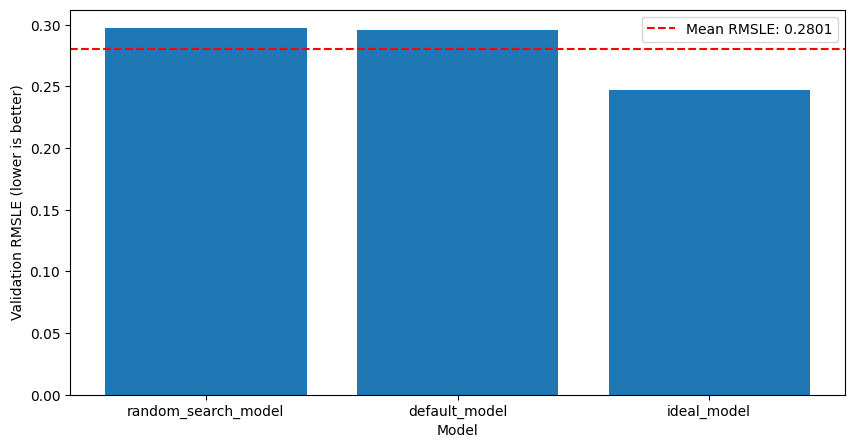

In [82]:
# Plot validation RMSLE against each other 
plt.figure(figsize=(10, 5))
plt.style.use('default')

# Get mean RSMLE score of all models
mean_rsmle_score = model_comparison_df["Valid RMSLE"].mean()

plt.bar(x=model_comparison_df["model_name"],
        height=model_comparison_df["Valid RMSLE"].values)

plt.xlabel("Model")
plt.ylabel("Validation RMSLE (lower is better)")

plt.xticks(rotation=0, fontsize=10);
plt.axhline(y=mean_rsmle_score, 
            color="red", 
            linestyle="--", 
            label=f"Mean RMSLE: {mean_rsmle_score:.4f}")
plt.legend()

plt.show()

## 6. Saving our best model to file

Since we've confirmed our best model as our `ideal_model` object, we can save it to file so we can load it in later and use it without having to retrain it.

> **Note:** For more on model saving options with Scikit-Learn, see the [documentation on model persistence](https://scikit-learn.org/stable/model_persistence.html).

To save our model we can use the [`joblib.dump`](https://joblib.readthedocs.io/en/stable/generated/joblib.dump.html) method.

In [83]:
import joblib

bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE_model.joblib"

# Save model to file
joblib.dump(value=ideal_model, filename=bulldozer_price_prediction_model_name)

['randomforest_regressor_best_RMSLE_model.joblib']

And to load our model we can use the [`joblib.load`](https://joblib.readthedocs.io/en/stable/generated/joblib.load.html) method.

In [84]:
# Load the best model
best_model = joblib.load(filename=bulldozer_price_prediction_model_name)
best_model

,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


We can make sure our model saving and loading worked by evaluating our `best_model` with `show_scores`.

In [85]:
# Confirm that the model works
best_model_scores = show_scores(model=best_model)

best_model_scores

{'Training MAE': 1957.6644849062795,
 'Valid MAE': 5962.5662049035645,
 'Training RMSLE': 0.10213525096545312,
 'Valid RMSLE': 0.2472769808502894,
 'Training R^2': 0.980996091339775,
 'Valid R^2': 0.8808974804283461}

And to confirm our `ideal_model` and `best_model` results are very close (if not the exact same), we can compare them with:
* The equality operator `==`.
* [`np.iclose`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html) and setting the absolute tolerance (`atol`) to `1e-4`.

In [86]:
# See if loaded model and pre-saved model results are the same
# Note: these values may be very slightly different depending on how precise your computer stores values.
best_model_scores["Valid RMSLE"] == ideal_model_scores["Valid RMSLE"]

True

In [87]:
# Is the loaded model as good as the non-loaded model?
if np.isclose(a=best_model_scores["Valid RMSLE"], 
              b=ideal_model_scores["Valid RMSLE"],
              atol=1e-4): # Make sure values are within 0.0001 of each other
    print("[INFO] Model results are close!")
else:
    print("[INFO] Model results aren't close, did something go wrong?")

[INFO] Model results are close!


> **Note:** When saving and loading a model, it is often the case to have very slightly different values at the extremes. For example, the pre-saved model may have an RMSLE of `0.24654150224930685` where as the loaded model may have an RMSLE of `0.24654150224930684` where in this case the values are off by `0.00000000000000001` (a very small number). This is due to the [precision of computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) and the way computers store values, where numbers are exact but can be represented up to a certain amount of precision. This is why we generally compare results with many decimals using `np.isclose` rather than the `==` operator.

## 7. Making predictions on test data

Now we've got a trained model saved and loaded, it's time to make predictions on the test data.

Our model is trained on data prior to 2011, however, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned from the training data to predict the sale price of a bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

Let's load in the test data from `Test.csv`, we'll make sure to parse the dates of the `saledate` column.

In [88]:
# Load the test data
test_df = pd.read_csv(filepath_or_buffer="../data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


You might notice that the `test_df` is missing the `SalePrice` column.

That's because that's the variable we're trying to predict based on all of the other variables.

We can make predictions with our `best_model` using the [`predict` method](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict).

In [89]:
# Let's see how the model goes predicting on the test data
test_preds = best_model.predict(X=test_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- saleDay
- saleDayofweek
- saleDayofyear
- saleMonth
- saleYear


Oh no!

We get an error:

> ValueError: The feature names should match those that were passed during fit.
> Feature names unseen at fit time:
> - saledate
> Feature names seen at fit time, yet now missing:
> - saleDay
> - saleDayofweek
> - saleDayofyear
> - saleMonth
> - saleYear

Ahhh... the test data isn't in the same format of our other data, so we have to fix it. 

### 7.1 Preprocessing the test data (to be in the same format as the training data)

Our model has been trained on data preprocessed in a certain way. 

This means in order to make predictions on the test data, we need to take the same steps we used to preprocess the training data to preprocess the test data.

Remember, whatever you do to preprocess the training data, you have to do to the test data.

Let's recreate the steps we used for preprocessing the training data except this time we'll do it on the test data.  

First, we'll add the extra date features to breakdown the `saledate` column.

In [90]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df = df.drop("saledate", axis=1)

    return df

# Preprocess test_df to have same columns as train_df (add the datetime features)
test_df = add_datetime_features_to_df(df=test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


Date features added!

Now can we make predictions with our model on the test data? 

In [91]:
# Try to predict with model
test_preds = best_model.predict(test_df)

ValueError: could not convert string to float: 'Low'

Another error...

> ValueError: could not convert string to float: 'Low'

We can fix this by running our `ordinal_encoder` (that we used to preprocess the training data) on the categorical features in our test DataFrame. 

In [92]:
# Create a copy of the test DataFrame to keep the original intact
test_df_preprocessed = test_df.copy()

# Transform the categorical features of the test DataFrame into numbers
test_df_preprocessed[categorical_features] = ordinal_encoder.transform(test_df_preprocessed[categorical_features].astype(str))
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 12457 non-null  float64
 8   fiModelDesc               12349 non-null  float64
 9   fiBaseModel               12431 non-null  float64
 10  fiSecondaryDesc           12449 non-null  float64
 11  fiModelSeries             12456 non-null  float64
 12  fiModelDescriptor         12452 non-null  float64
 13  ProductSize               12457 non-null  float64
 14  fiProd

Ok, date features created and categorical features turned into numbers, can we make predictions on the test data now?

In [93]:
# Make predictions on the preprocessed test data
test_preds = best_model.predict(test_df_preprocessed)

Holy smokes! It worked!

Let's check out our `test_preds`.

In [94]:
# Check the first 10 test predictions
test_preds[:10]

array([14840.24911817, 31807.8866843 , 47955.41005291, 94938.32952541,
       27161.31393298, 29876.92059484, 26190.75396825, 19583.83597884,
       18251.43165785, 30026.34259259])

Wonderful, looks like we're getting the price predictions of a given bulldozer.

How many predictions are there?

In [95]:
# Check number of test predictions
test_preds.shape, test_df.shape

((12457,), (12457, 56))

Perfect, looks like theres one prediction per sample in the test DataFrame.

Now how would we submit our predictions to Kaggle?

Well, when looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format. 

Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

Let's make it.

In [96]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df = pd.DataFrame()
pred_df["SalesID"] = test_df["SalesID"]
pred_df["SalePrice"] = test_preds

pred_df.sample(5)

,SalesID,SalePrice
10983,6630168,27253.367805
3725,6266947,48089.237213
1771,4409306,11975.739638
6731,6310465,10019.600750
4902,6280679,64687.195767


Excellent! We've got a `SalePrice` prediction for every `SalesID` in the test DataFrame.

Let's save this to CSV so we could upload it or share it with someone else if we had to.

In [97]:
# Export test dataset predictions to CSV
pred_df.to_csv("predictions.csv", index=False)

## 8. Making a prediction on a custom sample

We've made predictions on the test dataset which contains sale data from May to November 2012.

But how does our model go on a more recent bulldozer sale?

If we were to find an advertisement on a bulldozer sale, could we use our model on the information in the advertisement to predict the sale price?

In other words, how could we use our model on a single custom sample?

It's one thing to predict on data that has already been formatted but it's another thing to be able to predict on a completely new and unseen sample.

> **Note:** For predicting on a custom sample, the same rules apply as making predictions on the test dataset. The data you make predictions on should be in the same format that your model was trained on. For example, it should have all the same features and the numerical encodings should be in the same ballpark (e.g. preprocessed by the `ordinal_encoder` we fit to the training set). It's likely that samples you collect from the wild may not be as well formatted as samples in a pre-existing dataset. So it's the job of the machine learning engineer to be able to format/preprocess new samples in the same way a model was trained on.

If we're going to make a prediction on a custom sample, it'll need to be in the same format as our other datasets.

So let's remind ourselves of the columns/features in our test dataset.

In [98]:
# Get example from test_df
test_df_preprocessed_sample = test_df_preprocessed.sample(n=1, random_state=42)

# Turn back into original format
test_df_unpreprocessed_sample = test_df_preprocessed_sample.copy() 
test_df_unpreprocessed_sample[categorical_features] = ordinal_encoder.inverse_transform(test_df_unpreprocessed_sample[categorical_features])
test_df_unpreprocessed_sample.to_dict(orient="records")

[{'SalesID': 1229148,
  'MachineID': 1042578,
  'ModelID': 9579,
  'datasource': 121,
  'auctioneerID': 3,
  'YearMade': 2004,
  'MachineHoursCurrentMeter': 3290.0,
  'UsageBand': 'Medium',
  'fiModelDesc': 'S250',
  'fiBaseModel': 'S250',
  'fiSecondaryDesc': 'nan',
  'fiModelSeries': 'nan',
  'fiModelDescriptor': 'nan',
  'ProductSize': 'nan',
  'fiProductClassDesc': 'Skid Steer Loader - 2201.0 to 2701.0 Lb Operating Capacity',
  'state': 'Missouri',
  'ProductGroup': 'SSL',
  'ProductGroupDesc': 'Skid Steer Loaders',
  'Drive_System': 'nan',
  'Enclosure': 'EROPS',
  'Forks': 'None or Unspecified',
  'Pad_Type': 'nan',
  'Ride_Control': 'nan',
  'Stick': 'nan',
  'Transmission': 'nan',
  'Turbocharged': 'nan',
  'Blade_Extension': 'nan',
  'Blade_Width': 'nan',
  'Enclosure_Type': 'nan',
  'Engine_Horsepower': 'nan',
  'Hydraulics': 'Auxiliary',
  'Pushblock': 'nan',
  'Ripper': 'nan',
  'Scarifier': 'nan',
  'Tip_Control': 'nan',
  'Tire_Size': 'nan',
  'Coupler': 'Hydraulic',
  'C

Wonderful, so if we're going to make a prediction on a custom sample, we'll need to fill out these details as much as we can.

Let's try and make a prediction on the example test sample.

In [99]:
# Make a prediction on the preprocessed test sample
best_model.predict(test_df_preprocessed_sample)

array([13933.46119929])

Nice!

We get an output array containing a predicted `SalePrice`.

Let's now try it on a custom sample.

Again, like all good machine learning cooking shows, I've searched the internet for "bulldozer sales in America" and [found a sale from 6th July 2024](https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri) (if the link doesn't work, check out the screenshot below).

| <img src="https://github.com/mohsinansari0705/Machine-Learning-Data-Science/blob/main/images/structured-data-custom-bulldozer-advertisement.png?raw=true" alt="Image of a 2004 Caterpillar D6R XL dozer from an online auction listing. The dozer is yellow, has an enclosed cab with AC and heat, and a large front blade. Key specs shown include 11,770 hours, a Caterpillar C9 diesel engine, and joystick steering. Tracks are 22 inches wide with single grouser pads. The contract price is $72,600." width=750/> | 
|:--:| 
| Screenshot of a bulldozer sale advertisement. I took information from this advertisement to create our own custom sample for testing our machine learning model on data from the wild. [Source](https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri). |

I went through the advertisement online and collected as much detail as I could and formatted the dictionary below with all of the related fields.

It may not be perfect but data in the real world is rarely perfect.

For values I couldn't find or were inconspicuous, I filled them with `np.nan` (or `NaN`). 

Some values such as `SalesID` were unobtainable because they were part of the original collected dataset, for these I've also used `np.nan`.

Also notice how I've already created the extra date features `saleYear`, `saleMonth`, `saleDay` and more by manually breaking down the listed sale date of 6 July 2024.

In [100]:
# Create a dictionary of features and values from an internet-based bulldozer advertisement
# See link: https://www.purplewave.com/auction/240606/item/EK8504/2004-Caterpillar-D6R_XL-Crawlers-Crawler_Dozer-Missouri 
custom_sample = {
  "SalesID": np.nan,
  "MachineID": 8504,
  "ModelID": np.nan,
  "datasource": np.nan,
  "auctioneerID": np.nan,
  "YearMade": 2004,
  "MachineHoursCurrentMeter": 11770.0,
  "UsageBand": "High",
  "fiModelDesc": "D6RXL",
  "fiBaseModel": "D6",
  "fiSecondaryDesc": "XL",
  "fiModelSeries": np.nan,
  "fiModelDescriptor": np.nan,
  "ProductSize": "Medium",
  "fiProductClassDesc": "Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower",
  "state": "Missouri",
  "ProductGroup": "TTT",
  "ProductGroupDesc": "Track Type Tractors",
  "Drive_System": "No",
  "Enclosure": "EROPS",
  "Forks": "None or Unspecified",
  "Pad_Type": "Grouser",
  "Ride_Control": "None or Unspecified",
  "Stick": "nan",
  "Transmission": "Powershift",
  "Turbocharged": "None or Unspecified",
  "Blade_Extension": "None or Unspecified",
  "Blade_Width": np.nan,
  "Enclosure_Type": np.nan,
  "Engine_Horsepower": np.nan,
  "Hydraulics": np.nan,
  "Pushblock": "None or Unspecified",
  "Ripper": "None or Unspecified",
  "Scarifier": "None or Unspecified",
  "Tip_Control": "Tip",
  "Tire_Size": np.nan,
  "Coupler": np.nan,
  "Coupler_System": np.nan,
  "Grouser_Tracks": "Yes",
  "Hydraulics_Flow": np.nan,
  "Track_Type": "Steel",
  "Undercarriage_Pad_Width": "22 inch",
  "Stick_Length": np.nan,
  "Thumb": np.nan,
  "Pattern_Changer": np.nan,
  "Grouser_Type": "Single",
  "Backhoe_Mounting": "None or Unspecified",
  "Blade_Type": "Semi U",
  "Travel_Controls": np.nan,
  "Differential_Type": np.nan,
  "Steering_Controls": "Command Control",
  "saleYear": 2024,
  "saleMonth": 6,
  "saleDay": 7,
  "saleDayofweek": 5,
  "saleDayofyear": 159
}

Now we've got a single custom sample in the form of a dictionary, we can turn it into a DataFrame.

In [101]:
# Turn single sample in a DataFrame
custom_sample_df = pd.DataFrame(custom_sample, index=[0])
custom_sample_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,High,D6RXL,D6,...,None or Unspecified,Semi U,NaN,NaN,Command Control,2024,6,7,5,159


And of course, we can preprocess the categoricial features using our `ordinal_encoder` (we use the same instance of `OrdinalEncoder` as we trained on the training dataset).

In [102]:
# Transform the categorical features of the custom sample
custom_sample_df[categorical_features] = ordinal_encoder.transform(custom_sample_df[categorical_features].astype(str))
custom_sample_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,0.0,2308.0,703.0,...,0.0,6.0,7.0,4.0,0.0,2024,6,7,5,159


Custom sample preprocessed, let's make a prediction!

In [103]:
# Make a prediction on the preprocessed custom sample
custom_sample_pred = best_model.predict(custom_sample_df)

print(f"[INFO] Predicted sale price of custom sample: ${round(custom_sample_pred[0], 2)}")

[INFO] Predicted sale price of custom sample: $54897.04


Now how close was this to the actual sale price (listed on the advertisement) of $72,600?

In [104]:
# Evaluate our model versus the actual sale price
custom_sample_actual_sale_price = [72600] # this is the sale price listed on the advertisement

print(f"[INFO] Model MAE on custom sample: {mean_absolute_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")
print(f"[INFO] Model RMSLE on custom sample: {root_mean_squared_log_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")

[INFO] Model MAE on custom sample: 17702.961606294943
[INFO] Model RMSLE on custom sample: 0.2795010784970433


Woah!

We get a quite high MAE value, however, it looks like our model's RMSLE performance on the custom sample was even better than the `best_model` on the validation dataset.

Not too bad for a model trained on sales data over 12 years older than our custom sample's sale date.

> **Note:** In practice, to make this process easier, rather than manually typing out all of the feature values by hand, you might want to create an application capable of ingesting these values in a nice user interface. To create such machine learning applications, I'd practice by checking out [Streamlit](https://streamlit.io/) or [Gradio](https://www.gradio.app/).

## 9. Finding the most important predictive features

Since we've built a model which is able to make predictions, the people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. 

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

We can do this for our `sklearn.ensemble.RandomForestRegressor` instance using the [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) attribute.

Let's check it out.

In [105]:
# Find feature importance of our best model
best_model_feature_importances = best_model.feature_importances_

best_model_feature_importances

array([3.80899285e-02, 2.78329134e-02, 5.58903529e-02, 2.06070473e-03,
       5.20626489e-03, 1.97179928e-01, 6.75448214e-03, 1.44188769e-03,
       5.06081799e-02, 4.61575548e-02, 3.84257527e-02, 4.51263539e-03,
       2.71914876e-02, 1.62306463e-01, 4.50166342e-02, 8.28573220e-03,
       4.65079292e-03, 5.42385169e-03, 1.47142396e-03, 6.61869518e-02,
       2.16568282e-03, 1.67585738e-03, 2.23426114e-03, 1.94798801e-04,
       1.13425652e-03, 1.88110803e-04, 4.29547393e-03, 2.85397451e-03,
       4.29591479e-03, 2.37653156e-03, 3.86910158e-03, 3.81910930e-03,
       5.98591029e-03, 2.94633215e-03, 2.40110107e-03, 8.78036755e-03,
       1.71018490e-03, 2.27712826e-02, 9.12693214e-03, 5.46289884e-03,
       1.71887413e-03, 1.38439965e-03, 1.50240891e-03, 1.05142561e-03,
       7.77850333e-04, 8.72719284e-04, 7.08671251e-04, 2.27525257e-03,
       2.81634306e-03, 6.07477918e-04, 4.22501655e-04, 7.18384147e-02,
       5.38697629e-03, 8.51456033e-03, 4.41447019e-03, 1.27256498e-02])

Woah, looks like we get one value per feature in our dataset.

In [106]:
print(f"[INFO] Number of feature importance values: {best_model_feature_importances.shape[0]}") 
print(f"[INFO] Number of features in training dataset: {X_train_preprocessed.shape[1]}")

[INFO] Number of feature importance values: 56
[INFO] Number of features in training dataset: 56


We can inspect these further by turning them into a DataFrame.

We'll sort it descending order so we can see which feature our model is assigning the highest value.

In [107]:
# Create feature importance DataFrame
column_names = test_df.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": best_model_feature_importances}).sort_values(by="feature_importance", ascending=False)

feature_importance_df.head()

,feature_names,feature_importance
5,YearMade,0.197180
13,ProductSize,0.162306
51,saleYear,0.071838
19,Enclosure,0.066187
2,ModelID,0.055890


Hmmm... looks like `YearMade` may be contributing the most value in the model's eyes.

How about we turn our DataFrame into a plot to compare values?

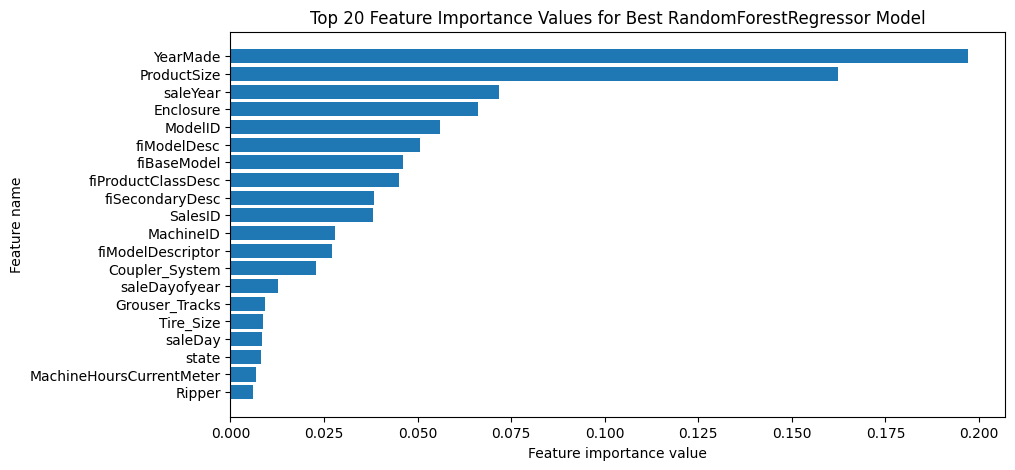

In [108]:
# Plot the top feature importance values
plt.figure(figsize=(10, 5))

top_n = 20
plt.barh(y=feature_importance_df["feature_names"][:top_n], # Plot the top_n feature importance values
         width=feature_importance_df["feature_importance"][:top_n])

plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
plt.xlabel("Feature importance value")
plt.ylabel("Feature name")

plt.gca().invert_yaxis()

plt.show()

Ok, looks like the top 4 features contributing to our model's predictions are `YearMade`, `ProductSize`, `saleYear` and `Enclosure`.

Referring to the original [data dictionary](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI), do these values make sense to be contributing the most to the model?

* `YearMade` - Year of manufacture of the machine.
* `ProductSize` - Size of the bulldozer.
* `Enclosure` - Type of bulldozer enclosure (e.g. OROPS = Open Rollover Protective Structures, EROPS = Enclosed Rollover Protective Structures).
* `saleYear` - The year the bulldozer was sold (this is one of our engineered features from `saledate`).

Now I've never sold a bulldozer but reading about each of these values seems to make sense that they would contribute significantly to the sale price.

I know when someone bought cars, the year that is was made was an important part of their decision.

And it also makes sense that `ProductSize` be an important feature when deciding on the price of a bulldozer.

Let's check out the unique values for `ProductSize` and `Enclosure`.


In [109]:
print(f"[INFO] Unique ProductSize values: {train_df['ProductSize'].unique()}")
print(f"[INFO] Unique Enclosure values: {train_df['Enclosure'].unique()}")

[INFO] Unique ProductSize values: ['Medium' nan 'Compact' 'Small' 'Large' 'Large / Medium' 'Mini']
[INFO] Unique Enclosure values: ['OROPS' 'EROPS' 'EROPS w AC' nan 'EROPS AC' 'NO ROPS'
 'None or Unspecified']


My guess is that a bulldozer with a `ProductSize` of `'Mini'` would sell for less than a bulldozer with a size of `'Large'`.

We could investigate this further in an extension to model driven data exploratory analysis or we could take this information to a colleague or client to discuss further.

Either way, we've now got a machine learning model capable of predicting the sale price of bulldozers given their features/attributes!

That's a huuuuuuge effort!

And you should be very proud of yourself for making it this far.

## Summary

We've covered a lot of ground.

But there are some main takeaways to go over.

* **Every machine learning problem is different** - Since machine learning is such a widespread technology, it can be used for a multitude of different problems. In saying this, there will often be many different ways to approach a problem. In this example, we've focused on predicting a number, which is a regression problem. And since our data had a time component, it could also be considered a time series problem.
* **The machine learner's motto: Experiment, experiment, experiment!** - Since there are many different ways to approach machine learning problems, one of the best habits you can develop is an experimental mindset. That means not being afraid to try new things over and over. Because the more things you try, the quicker you can figure what doesn't work and the quicker you can start to move towards what does.
* **Always keep the test set separate** - If you can't evaluate your model on unseen data, how would you know how it will perform in the real world on future unseen data? Of course, using a test set isn't a perfect replica of the real world but if it's done right, it can give you a good idea. Because evaluating a model is just as important as training a model.
* **If you've trained a model on a data in a certain format, you'll have to make predictions in the same format** - Any preprocessing you do to the training dataset, you'll have to do to the validation, test and custom data. Any computed values should happen on the training set only and then be used to update any subsequent datasets.

## Extra-curriculum

The following resources are suggested extra reading and activities to add backing to the materials we've covered in this project.

Reading documentation and knowing where to find information is one of the best skills you can develop as an engineer.

* Read the pandas [IO tools documentation page](https://pandas.pydata.org/docs/user_guide/io.html#) for an idea of all the possible ways to get data in and out of pandas.
* See all of the [available datatypes in the pandas user guide](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes) (knowing what type your data is in can help prevent a lot of future errors).
* Read the Scikit-Learn [dataset transformations](https://scikit-learn.org/stable/data_transforms.html) and [data preprocessing guide](https://scikit-learn.org/stable/modules/preprocessing.html) for an overview of all the different ways you can preprocess and transform data. 
* For more on saving and loading model objects with Scikit-Learn, see the documentation on [model persistence](https://scikit-learn.org/stable/model_persistence.html).
* For more on the importance of creating good validation and test sets, I'd recommend reading [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas as well as [The importance of a test set](https://www.learnml.io/posts/the-importance-of-a-test-set/) by Daniel Bourke.
* We've covered a handful of models in the Scikit-Learn library, however, there are some other ML models which are worth exploring such as [CatBoost](https://catboost.ai/) and [XGBoost](https://xgboost.ai/). Both of these models can handle missing values and are often touted as some of the most performant ML models on the market. A good extension would be to try get one of them working on our bulldozer data.
    * Bonus: You can also see a [list of models in Scikit-Learn which can handle missing/NaN values](https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values).   